In, Capital Asset Pricing Model, we discussed the simplest one-factor linear
model: CAPM. As mentioned, this one-factor linear model serve as a benchmark for
more advanced and complex models.

In this file, we will focus on the famous
* Fama-French three-factor model, 
* Fama-French-Carhart four-factor model, and
* Fama-French five-factor model. 

After understanding those models, we should
be able to develop our own multifactor linear models, such as by adding 
* Gross Domestic Product (GDP), 
* Consumer Price Index (CPI), 
* a business cycle indicator
* or other variables as an extra factor(s). 

In addition, we will discuss performance
measures, such as the 
* Sharpe ratio, 
* Treynor ratio, and 
* Jensen's alpha. 

In particular,
the following topics will be covered in this chapter:

* Introduction to the Fama-French three-factor model
* Fama-French-Carhart four-factor model
* Fama-French five-factor model
* Other multiplefactor models
* Sharpe ratio and Treynor ratio
* Lower partial standard deviation and Sortino ratio
* Jensen's alpha
* How to merge different datasets

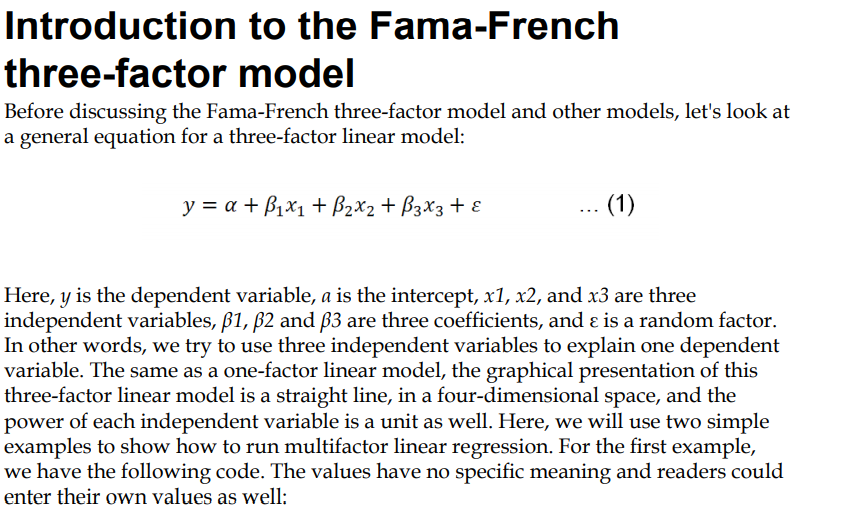

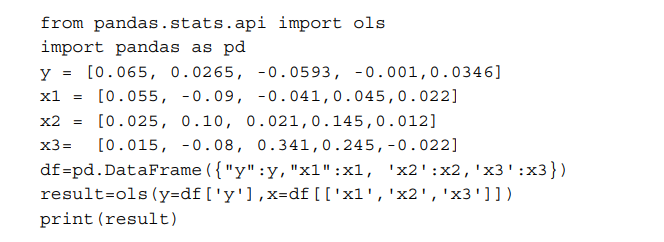

In [23]:
# from pandas.stats.api import ols
import pandas as pd
import statsmodels.api as sm

y = [0.065, 0.0265, -0.0593, -0.001,0.0346]
x1 = [0.055, -0.09, -0.041,0.045,0.022]
x2 = [0.025, 0.10, 0.021,0.145,0.012]
x3= [0.015, -0.08, 0.341,0.245,-0.022]

df=pd.DataFrame({"y":y,"x1":x1, 'x2':x2,'x3':x3})
result= sm.OLS(df['y'],df[['x1','x2','x3']]).fit()

print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.735
Model:                            OLS   Adj. R-squared (uncentered):              0.338
Method:                 Least Squares   F-statistic:                              1.850
Date:                Thu, 29 Apr 2021   Prob (F-statistic):                       0.370
Time:                        14:39:48   Log-Likelihood:                          11.854
No. Observations:                   5   AIC:                                     -17.71
Df Residuals:                       2   BIC:                                     -18.88
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


In [27]:
print(result.params)

x1    0.378244
x2    0.332193
x3   -0.194456
dtype: float64


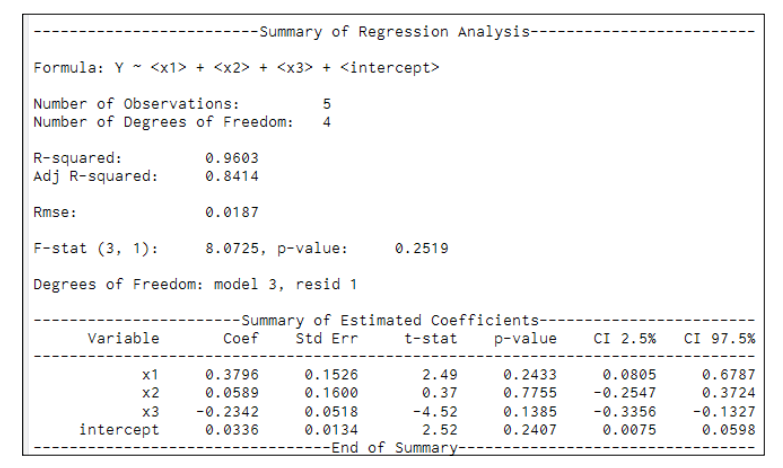

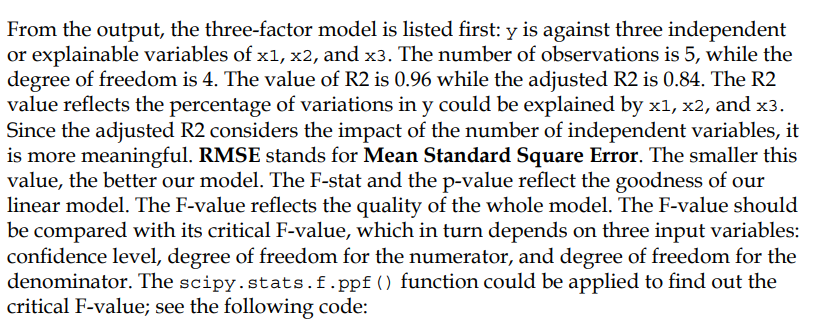

In [28]:
import scipy.stats as stats

alpha=0.05
dfNumerator=3
dfDenominator=1

f=stats.f.ppf(q=1-alpha, dfn=dfNumerator, dfd=dfDenominator)
print(f)

215.70734536960882


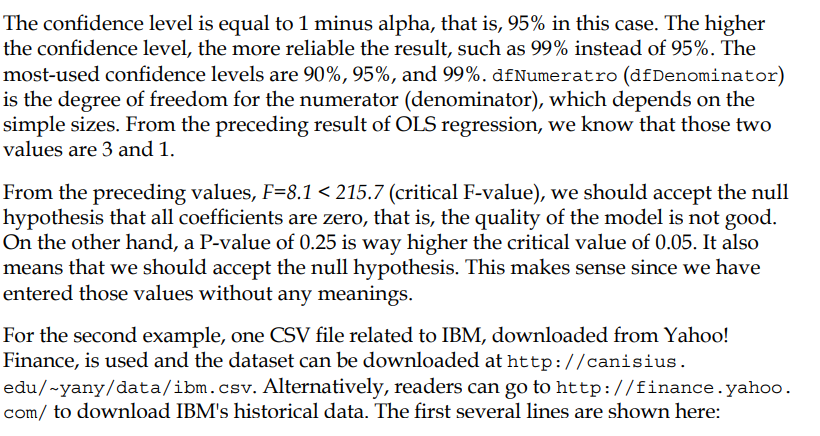

https://finance.yahoo.com/

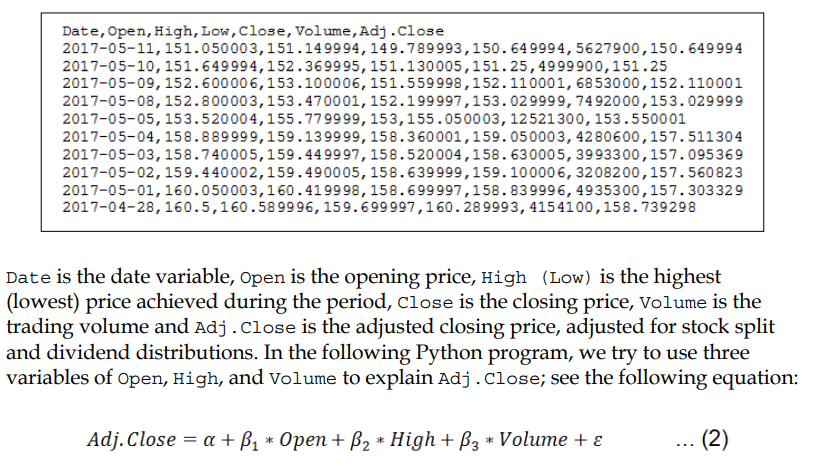

Again, this OLS regression just serves as an illustration showing how to run a threefactor model. It might have no economic meaning at all. The beauty of such an
example is that we could easily get data and test our Python program:

In [30]:
df = pd.read_csv("IBM.csv", index_col=0)
df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-03-31  112.000000  113.809998  110.169998  110.930000  105.098518   
2020-04-01  106.360001  109.919998  104.519997  105.139999   99.612892   
2020-04-02  105.370003  110.320000  105.139999  110.000000  104.217400   
2020-04-03  108.919998  110.070000  104.919998  106.339996  100.749802   
2020-04-06  110.349998  115.629997  110.129997  114.820000  108.784019   

             Volume  
Date                 
2020-03-31  6343300  
2020-04-01  6112900  
2020-04-02  6328700  
2020-04-03  4538800  
2020-04-06  7034200

In [32]:
x = df[['Open', 'High', 'Volume']]
y = df['Adj Close']
x = sm.add_constant(x)
result = sm.OLS(y, x).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     409.3
Date:                Thu, 29 Apr 2021   Prob (F-statistic):           6.37e-96
Time:                        14:53:27   Log-Likelihood:                -577.63
No. Observations:                 253   AIC:                             1163.
Df Residuals:                     249   BIC:                             1177.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.5590      3.816     -3.292      0.0

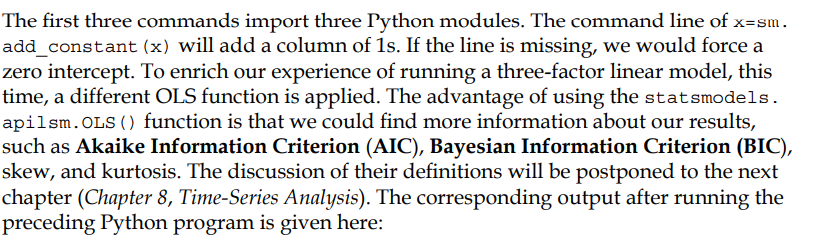

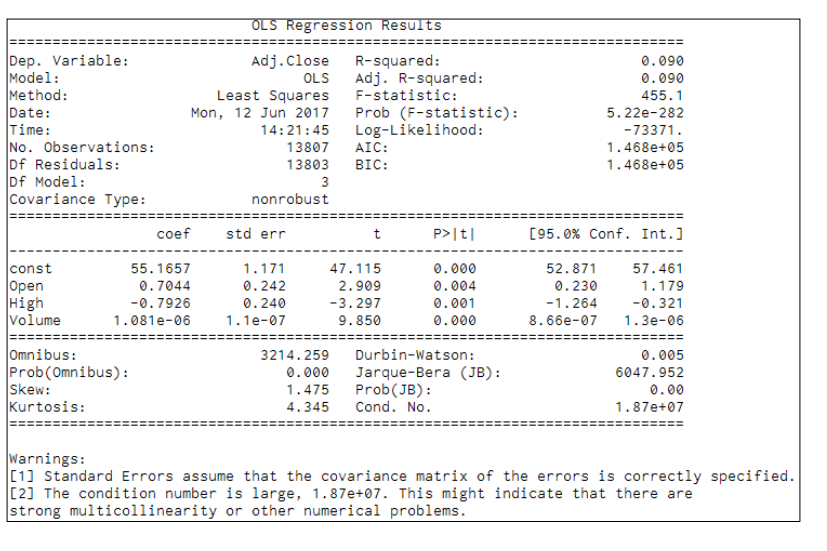

Again, we will refrain from spending time interpreting the result since our objective
at the moment is to show how to run a three-factor regression

### Fama-French three-factor model

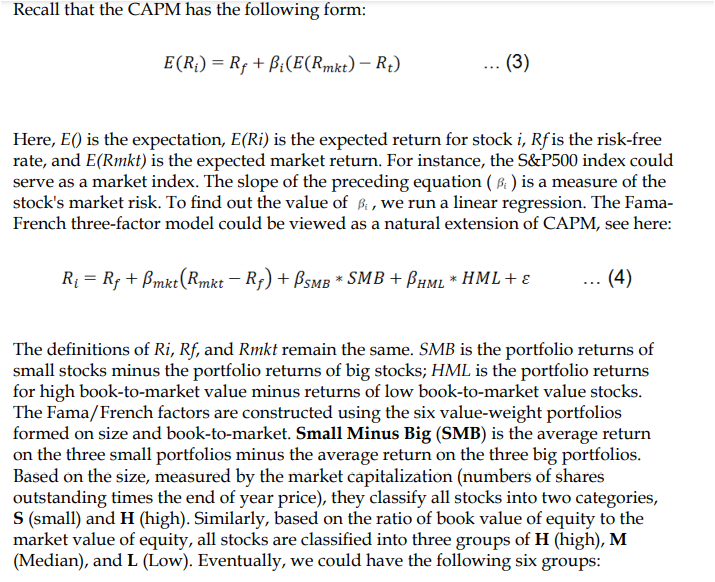

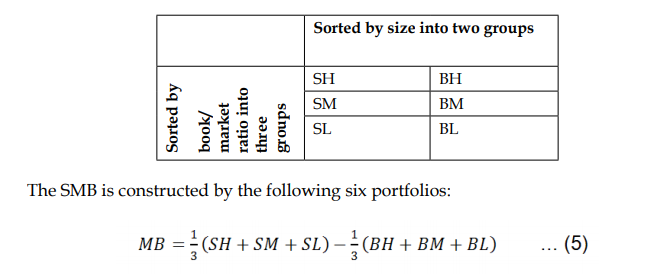

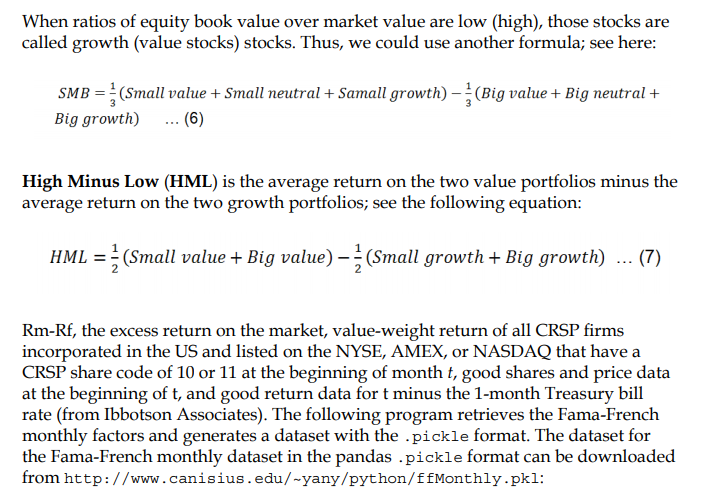

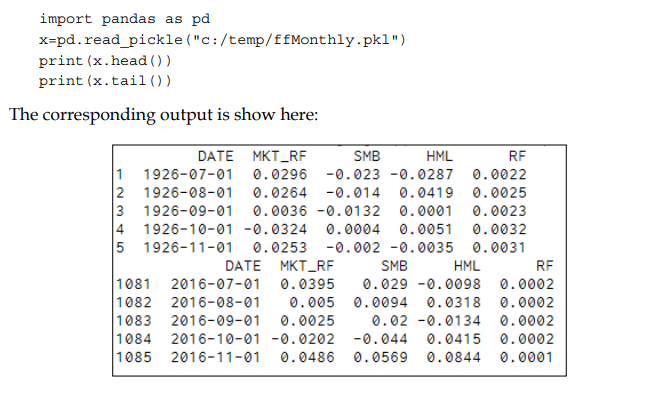

In [83]:
# Python program to generate

import scipy as sp
import numpy as np
import pandas as pd

file=open("ffMonthly.txt","r")
data=file.readlines()
print(data[6].split())
print(data[7].split())

['Mkt-RF', 'SMB', 'HML', 'RF']
['199007', '0.77', '0.53', '-0.36', '0.68']


In [84]:
f=[]
index=[]

for i in range(7,np.size(data)):

    t=data[i].split()
    date = pd.to_datetime(t[0]+'01', format='%Y%m%d').date()
    index.append(date)
    
    for j in range(1,5):
        k=float(t[j])
        f.append(k/100)

In [85]:
f[0]

0.0077

In [86]:
n=len(f)
f1=np.reshape(f,[n//4,4])
ff=pd.DataFrame(f1,index=index,columns=['MKT_RF','SMB','HML','Rf'])
ff.to_pickle("ffMonthly.pkl")

In [87]:
pd.read_pickle('ffMonthly.pkl')

MKT_RF     SMB     HML      Rf
1990-07-01  0.0077  0.0053 -0.0036  0.0068
1990-08-01 -0.1077 -0.0151  0.0048  0.0066
1990-09-01 -0.1189  0.0132  0.0081  0.0060
1990-10-01  0.0935 -0.0758 -0.0448  0.0068
1990-11-01 -0.0372  0.0144  0.0113  0.0057
...            ...     ...     ...     ...
2020-10-01 -0.0260  0.0122  0.0204  0.0001
2020-11-01  0.1334  0.0067  0.0434  0.0001
2020-12-01  0.0482  0.0331 -0.0120  0.0001
2021-01-01 -0.0055  0.0297  0.0101  0.0000
2021-02-01  0.0289  0.0054  0.0730  0.0000

[368 rows x 4 columns]

Next, we show how to run a Fama-French three-factor regression using 5-year
monthly data. The added twist is that the historical price data is downloaded
first. Then we calculate monthly returns and convert them to monthly ones before
merging with the monthly Fama-French three-factor time series:

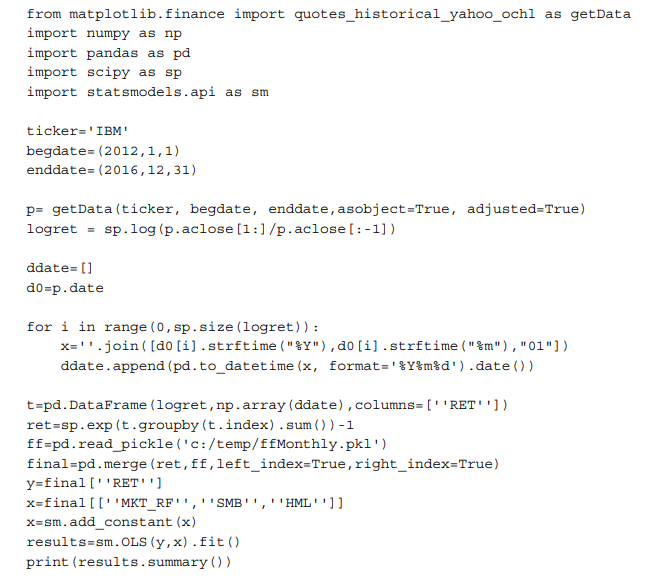

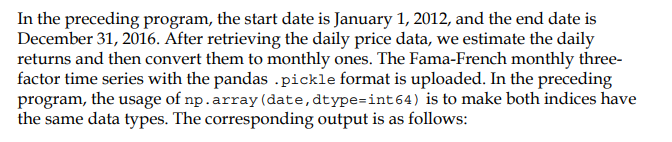

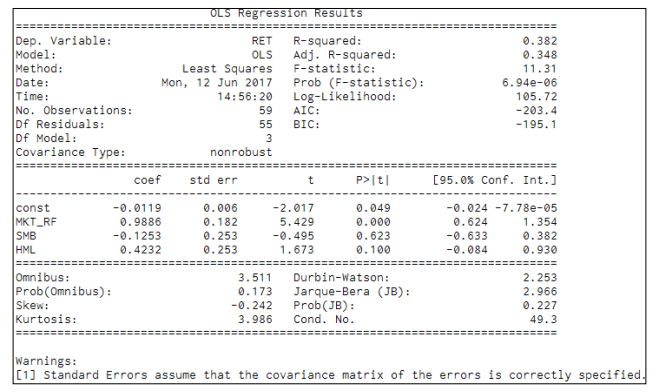

In [88]:
import pandas_datareader.data as web

import numpy as np
import pandas as pd
import scipy as sp
import statsmodels.api as sm

In [89]:
ticker='IBM'
begdate="1/1/2012" # (2012,1,1)
enddate="31/12/2016" # (2016,12,31)

In [90]:
p= web.get_data_yahoo(ticker, begdate, enddate)

In [91]:
p.tail()

High         Low        Open       Close     Volume  \
Date                                                                    
2016-12-23  167.490005  166.449997  167.000000  166.710007  1701200.0   
2016-12-27  167.979996  166.850006  166.979996  167.139999  1397500.0   
2016-12-28  167.740005  166.000000  167.289993  166.190002  1757500.0   
2016-12-29  166.990005  166.000000  166.020004  166.600006  1663500.0   
2016-12-30  166.699997  165.500000  166.440002  165.990005  2952800.0   

             Adj Close  
Date                    
2016-12-23  137.376648  
2016-12-27  137.730972  
2016-12-28  136.948135  
2016-12-29  137.285995  
2016-12-30  136.783325

In [92]:
logret = sp.log(p.Close[1:]/p.Close[:-1])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
  """Entry point for launching an IPython kernel.


In [93]:
ddate=[]
d0=p.index

In [94]:
for i in range(0,sp.size(logret)):
    x=''.join([d0[i].strftime("%Y"),d0[i].strftime("%m"),"01"])
    ddate.append(pd.to_datetime(x, format='%Y%m%d').date())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: scipy.size is deprecated and will be removed in SciPy 2.0.0, use numpy.size instead
  """Entry point for launching an IPython kernel.


In [95]:
t=pd.DataFrame(logret,np.array(ddate),columns=["RET"])
ret=sp.exp(t.groupby(t.index).sum())-1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  


In [96]:
ff=pd.read_pickle('ffMonthly.pkl')
final=pd.merge(ret,ff,left_index=True,right_index=True)

In [98]:
y=final['RET']
x=final[['MKT_RF','SMB','HML']]
x=sm.add_constant(x)
results=sm.OLS(y,x).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 30 Apr 2021   Prob (F-statistic):                nan
Time:                        11:51:35   Log-Likelihood:                    inf
No. Observations:                  60   AIC:                              -inf
Df Residuals:                      56   BIC:                              -inf
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const               0          0        nan        n

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1774: RuntimeWarning: invalid value encountered in double_scalars
  return self.mse_model/self.mse_resid
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:889: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:46: RuntimeWarning: invalid value encountered in double_scalars
  dw = np.sum(diff_resids**2, axis=axis) / np.sum(resids**2, axis=axis)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
